<a href="https://colab.research.google.com/github/ayush7121/ayush7121/blob/main/FinalYearProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.dummy import DummyClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


In [47]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
data = pd.read_csv("/content/drive/MyDrive/Data (1)/oasis_longitudinal.csv")
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [45]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Visit,373.0,1.882038,0.922843,1.000,1.000,2.000,2.000,5.000
MR Delay,373.0,595.104558,635.485118,0.000,0.000,552.000,873.000,2639.000
Age,373.0,77.013405,7.640957,60.000,71.000,77.000,82.000,98.000
EDUC,373.0,14.597855,2.876339,6.000,12.000,15.000,16.000,23.000
SES,354.0,2.460452,1.134005,1.000,2.000,2.000,3.000,5.000
MMSE,371.0,27.342318,3.683244,4.000,27.000,29.000,30.000,30.000
CDR,373.0,0.290885,0.374557,0.000,0.000,0.000,0.500,2.000
eTIV,373.0,1488.128686,176.139286,1106.000,1357.000,1470.000,1597.000,2004.000
nWBV,373.0,0.729568,0.037135,0.644,0.700,0.729,0.756,0.837
ASF,373.0,1.195461,0.138092,0.876,1.099,1.194,1.293,1.587


In [6]:
data.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

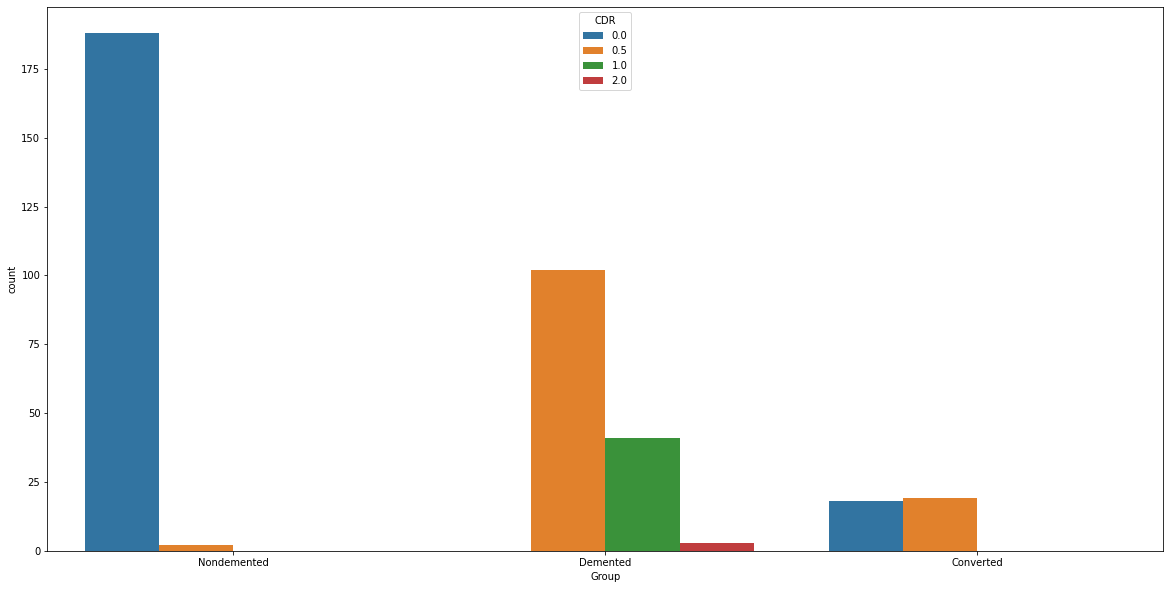

In [7]:
plt.figure(figsize=(20,10))
sns.countplot(data=data,x="Group",hue="CDR")

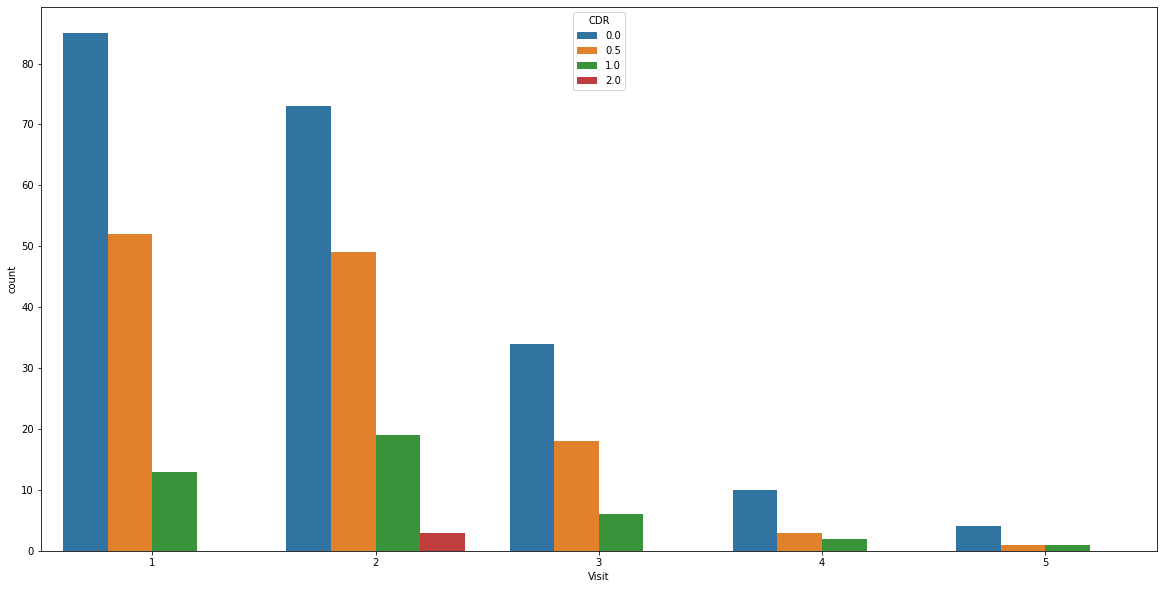

In [8]:
plt.figure(figsize=(20,10))
sns.countplot(data=data,x="Visit",hue="CDR")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

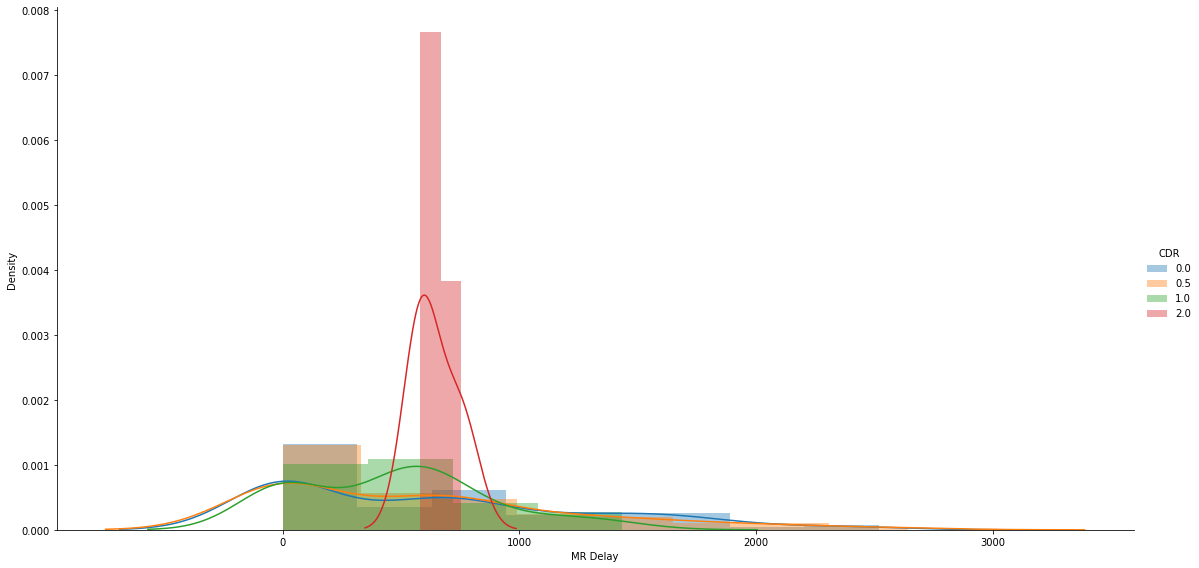

In [9]:
sns.FacetGrid(data=data,hue="CDR",height=8,aspect=2).map(sns.distplot,"MR Delay").add_legend()

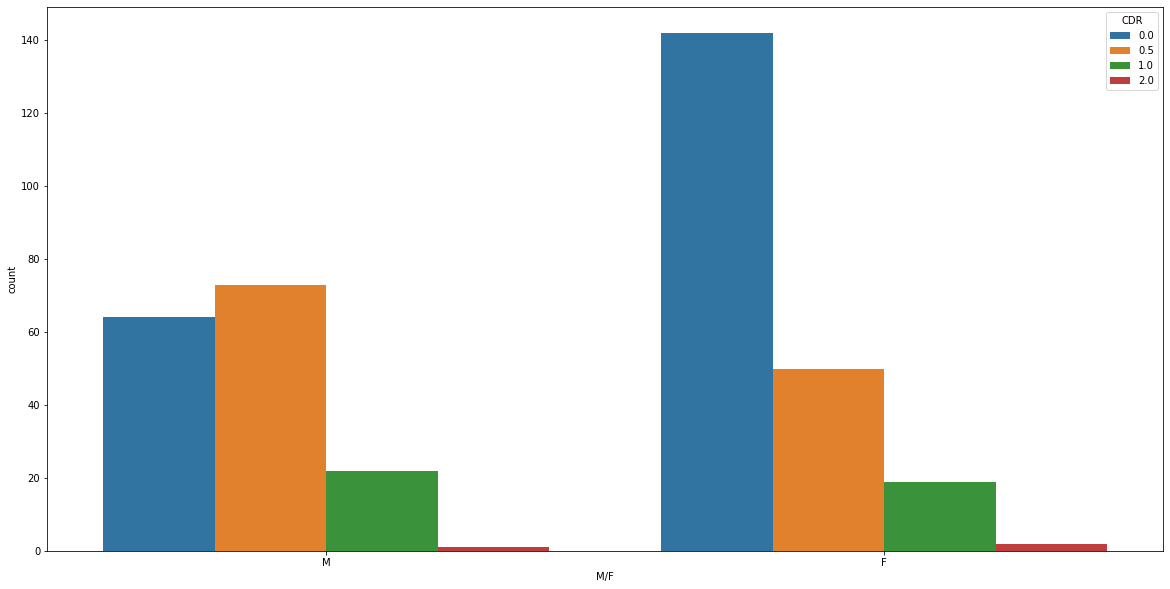

In [10]:
plt.figure(figsize=(20,10))
sns.countplot(data=data,x="M/F",hue="CDR")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


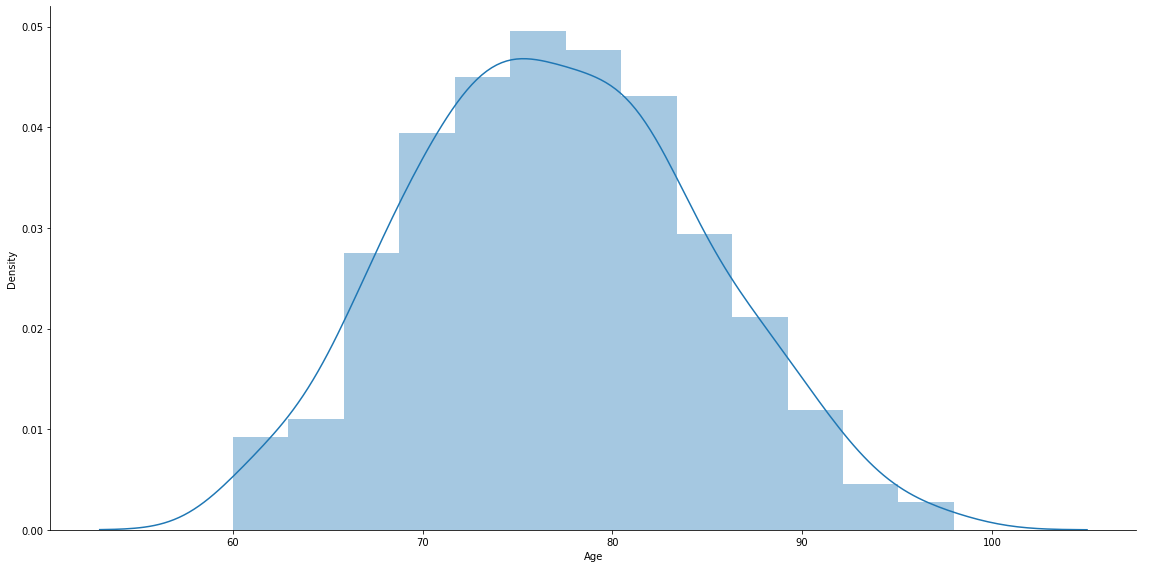

In [ ]:
sns.FacetGrid(data=data,height=8,aspect=2).map(sns.distplot,"Age").add_legend()

Text(0.5, 1.0, 'PLOTTING PDF v/s CDF FOR AGE')

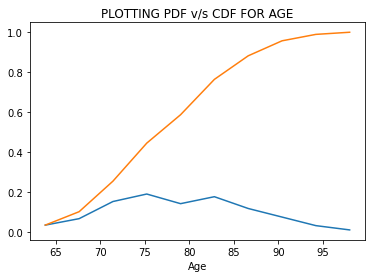

In [11]:
count1,binedges1 = np.histogram(data['Age'], bins=10, density = True)
pdf1=count1/sum(count1)
cdf1=np.cumsum(pdf1)
plt.plot(binedges1[1:],pdf1)
plt.plot(binedges1[1:], cdf1)
plt.xlabel("Age")
plt.title("PLOTTING PDF v/s CDF FOR AGE")

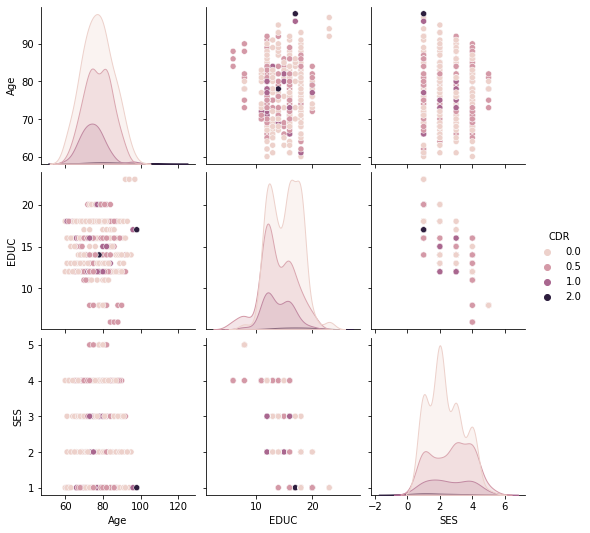

In [12]:
Demographics = data[['Age','EDUC','SES','CDR']]
sns.pairplot(Demographics,hue="CDR")

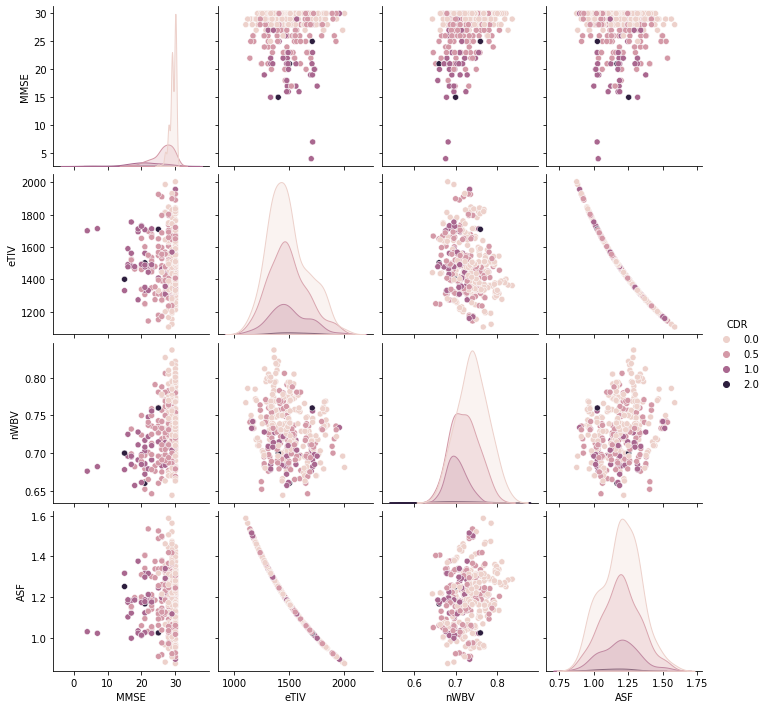

In [13]:
Clinical = data[['MMSE','eTIV','nWBV','ASF','CDR']]
sns.pairplot(Clinical,hue="CDR")

Points with CDR = 0.0  are =  55.22788203753352 %
Points with CDR = 0.5 are =  32.975871313672926 %
Points with CDR = 1.0 are =  10.991957104557642 %
Points with CDR = 2.0 are =  0.8042895442359249 %


([<matplotlib.patches.Wedge at 0x7f8320439820>,
 [Text(-0.1799594079746407, 1.0851795296085422, '0.0'),
  Text(-0.2251403805952944, -1.0767134293884357, '0.5'),
  Text(1.0150396579339906, -0.4239038721470324, '1.0'),
  Text(1.0996524674345731, -0.027648704581864855, '2.0')],
 [Text(-0.09815967707707672, 0.5919161070592048, '55.2%'),
  Text(-0.12280384396106966, -0.587298234211874, '33.0%'),
  Text(0.5536579952367221, -0.23122029389838128, '11.0%'),
  Text(0.5998104367824943, -0.015081111590108099, '0.8%')])

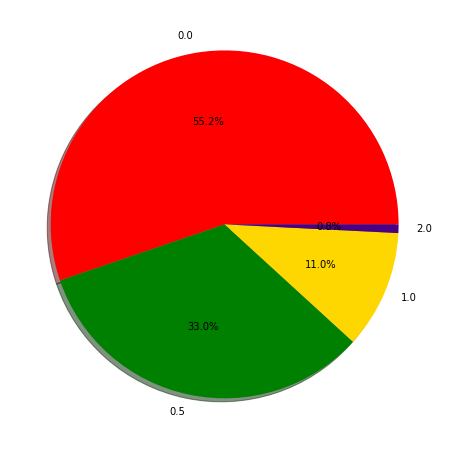

In [14]:
class_label = data['CDR'].value_counts()
total_points = len(data)
print("Points with CDR = 0.0  are = ",class_label.values[0]/total_points*100,"%")
print("Points with CDR = 0.5 are = ",class_label.values[1]/total_points*100,"%")
print("Points with CDR = 1.0 are = ",class_label.values[2]/total_points*100,"%")
print("Points with CDR = 2.0 are = ",class_label.values[3]/total_points*100,"%")
labels = ['0.0','0.5','1.0','2.0']
sizes = [55.22,32.97,10.99,0.80]
colors = ['red','green', 'gold','indigo']
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True)

In [16]:
new_data = data.drop(['Subject ID', 'MRI ID','Hand'],axis=1)

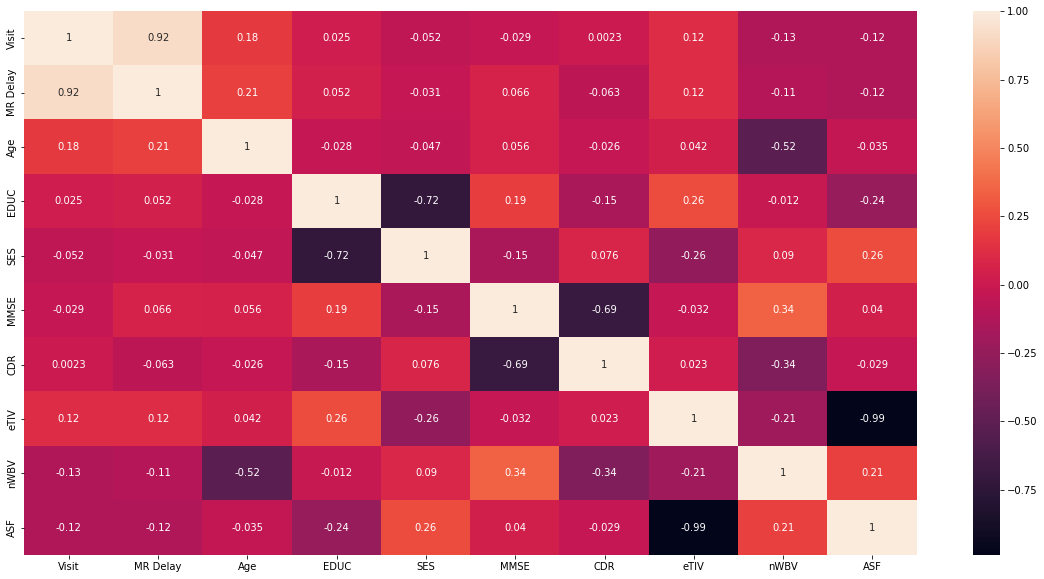

In [17]:
cor = new_data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True)

In [18]:
x = new_data.drop(['CDR'],axis=1)
y = new_data['CDR'].values

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=0)
print("Shape of x_train : ",x_train.shape)
print("Shape of x_test : ",x_test.shape)

Shape of x_train :  (261, 11)
Shape of x_test :  (112, 11)


In [20]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train['Group'])
x_train_group = vectorizer.transform(x_train['Group'])
x_test_group = vectorizer.transform(x_test['Group'])
print(x_train_group.shape)
print(x_test_group.shape)

(261, 3)
(112, 3)


#For Normalizer

In [21]:
normalizer = preprocessing.Normalizer()
normalizer.fit(x_train['MR Delay'].values.reshape(-1, 1))
x_train_mrdelay = normalizer.transform(x_train['MR Delay'].values.reshape(-1, 1))
x_test_mrdelay = normalizer.transform(x_test['MR Delay'].values.reshape(-1, 1))
print(x_train_mrdelay.shape)
print(x_test_mrdelay.shape)


(261, 1)
(112, 1)


In [22]:
le = preprocessing.LabelEncoder()
le.fit(x_train['M/F'])
x_train_gender = le.transform(x_train['M/F']).reshape(1,-1).T
x_test_gender = le.transform(x_test['M/F']).reshape(1,-1).T
print(x_train_gender.shape)
print(x_test_gender.shape)

(261, 1)
(112, 1)


In [23]:
normalizer = preprocessing.Normalizer()
x_train_age = x_train['Age'].values.reshape(-1, 1)
x_test_age = x_test['Age'].values.reshape(-1, 1)

combined_age = np.concatenate((x_train_age, x_test_age), axis=0)
normalizer.fit(combined_age)

x_train_age = normalizer.transform(x_train_age)
x_test_age = normalizer.transform(x_test_age)

print(x_train_age.shape)
print(x_test_age.shape)


(261, 1)
(112, 1)


In [24]:
normalizer = preprocessing.Normalizer()
normalizer.fit(x_train['EDUC'].values.reshape(-1, 1))
x_train_educ = normalizer.transform(x_train['EDUC'].values.reshape(-1, 1))
x_test_educ = normalizer.transform(x_test['EDUC'].values.reshape(-1, 1))
print(x_train_educ.shape)
print(x_test_educ.shape)

(261, 1)
(112, 1)


In [25]:
x_train['SES'] = x_train['SES'].fillna(0.0)
x_test['SES'] = x_test['SES'].fillna(0.0)

In [26]:
x_train.SES = x_train.SES.astype(int)
x_test.SES = x_test.SES.astype(int)

In [27]:
x_train['MMSE'] = x_train['MMSE'].fillna(0)
x_test['MMSE'] = x_test['MMSE'].fillna(0)

In [28]:
normalizer = preprocessing.Normalizer()
normalizer.fit(x_train['MMSE'].values.reshape(-1,1))
x_train_mmse = normalizer.transform(x_train['MMSE'].values.reshape(-1,1))
x_test_mmse = normalizer.transform(x_test['MMSE'].values.reshape(-1,1))
print(x_train_mmse.shape)
print(x_test_mmse.shape)

(261, 1)
(112, 1)


In [29]:
normalizer = preprocessing.Normalizer()
normalizer.fit(x_train['eTIV'].values.reshape(-1,1))
x_train_etiv = normalizer.transform(x_train['eTIV'].values.reshape(-1,1))
x_test_etiv = normalizer.transform(x_test['eTIV'].values.reshape(-1,1))
print(x_train_etiv.shape)
print(x_test_etiv.shape)

(261, 1)
(112, 1)


In [30]:
normalizer = preprocessing.Normalizer()
normalizer.fit(x_train['nWBV'].values.reshape(-1,1))
x_train_nwbv = normalizer.transform(x_train['nWBV'].values.reshape(-1,1))
x_test_nwbv = normalizer.transform(x_test['nWBV'].values.reshape(-1,1))
print(x_train_nwbv.shape)
print(x_test_nwbv.shape)

(261, 1)
(112, 1)


In [31]:
normalizer = preprocessing.Normalizer()
normalizer.fit(x_train['ASF'].values.reshape(-1,1))
x_train_asf = normalizer.transform(x_train['ASF'].values.reshape(-1,1))
x_test_asf = normalizer.transform(x_test['ASF'].values.reshape(-1,1))
print(x_train_asf.shape)
print(x_test_asf.shape)

(261, 1)
(112, 1)


In [32]:
#train class label
for i in range(len(y_train)):
    if y_train[i] == 0.0:
        y_train[i]=1
    if y_train[i] == 0.5:
        y_train[i]=2
    if y_train[i] == 1.0:
        y_train[i]=3
    if y_train[i] == 2.0:
        y_train[i]=4
#test class label        
for i in range(len(y_test)):
    if y_test[i] == 0.0:
        y_test[i]=1
    if y_test[i] == 0.5:
        y_test[i]=2
    if y_test[i] == 1.0:
        y_test[i]=3
    if y_test[i] == 2.0:
        y_test[i]=4

In [33]:
dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(x_train, y_train)
print("Train Accuracy = ",dummy_clf.score(x_train,y_train))
print("Test Accuracy = ",dummy_clf.score(x_test,y_test))

Train Accuracy =  0.47126436781609193
Test Accuracy =  0.49107142857142855


In [34]:
x_tr = hstack((x_train_group,x_train['Visit'].values.reshape(-1,1),x_train_mrdelay,x_train_gender,x_train_age,x_train_educ,x_train['SES'].values.reshape(-1,1),x_train_mmse,x_train_etiv,x_train_nwbv)).tocsr()
x_ts = hstack((x_test_group,x_test['Visit'].values.reshape(-1,1),x_test_mrdelay,x_test_gender,x_test_age,x_test_educ,x_test['SES'].values.reshape(-1,1),x_test_mmse,x_test_etiv,x_test_nwbv)).tocsr()

In [35]:
estimator = RandomForestRegressor()
param_grid = {
"n_estimators"
: [10,20,30],
"max_features"
: ["auto", "sqrt", "log2"],
"min_samples_split" : [2,4,8],
"bootstrap": [True, False],
}
grid = GridSearchCV(estimator, param_grid, n_jobs=-1)
grid.fit(x_tr, y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]})

In [36]:
grid.best_params_

{'bootstrap': True,
 'max_features': 'sqrt',
 'min_samples_split': 8,
 'n_estimators': 30}

In [37]:
rf = RandomForestRegressor(n_estimators=30,min_samples_split=8,max_features='auto',bootstrap=True)
rf.fit(x_tr,y_train)

RandomForestRegressor(min_samples_split=8, n_estimators=30)

In [38]:
print(rf.score(x_tr,y_train))
print(rf.score(x_ts,y_test))

0.7058283759769874
0.29945826066594483


In [39]:
params={"C":np.logspace(-3,3,7)}
lg=LogisticRegression(max_iter=1000)#if max_iter=100 ...the model will not converge
grid=GridSearchCV(lg,params,cv=2)
grid.fit(x_tr,y_train)

GridSearchCV(cv=2, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])})

In [40]:
grid.best_params_

{'C': 100.0}

In [41]:
lg=LogisticRegression(C=1000,max_iter=1000)
lg.fit(x_tr,y_train)
print(lg.score(x_tr,y_train))
print(lg.score(x_ts,y_test))

0.8888888888888888
0.7946428571428571


In [42]:
gnb = GaussianNB()
gnb.fit(x_tr.toarray(), y_train)
print("Train accuracy  = ",gnb.score(x_tr.toarray(),y_train))
print("Test accuracy = ",gnb.score(x_ts.toarray(),y_test))

Train accuracy  =  0.8620689655172413
Test accuracy =  0.7946428571428571


# New Section